In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import FeatureHasher
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay
from imblearn.over_sampling
import openpyxl


pd.options.mode.copy_on_write = True

In [10]:
df = pd.read_csv('fraudTrain.csv')

In [11]:
df.drop(columns=['ID','trans_num'],inplace=True)

# Removing *Names* features

In [12]:
df.drop(columns=['firstName','lastName'],inplace=True)

# Pre-Processing Features

### *Time* Feature

In [14]:
df['Time'] = pd.to_datetime(df['Time'])

In [15]:
df['Time:year'] = df['Time'].dt.year
df['Time:month'] = df['Time'].dt.month
df['Time:day'] = df['Time'].dt.day
df['Time:day_of_week'] = df['Time'].dt.day_of_week
df['Time:hour'] = df['Time'].dt.hour
df['Time:minute'] = df['Time'].dt.minute

In [16]:
df.drop(columns=['Time'], inplace=True)

In [17]:
df.dtypes

Card Number         float64
merchant             object
category             object
Amount              float64
is_fraud            float64
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
Time:hour             int32
Time:minute           int32
dtype: object

### *Amount* Feature

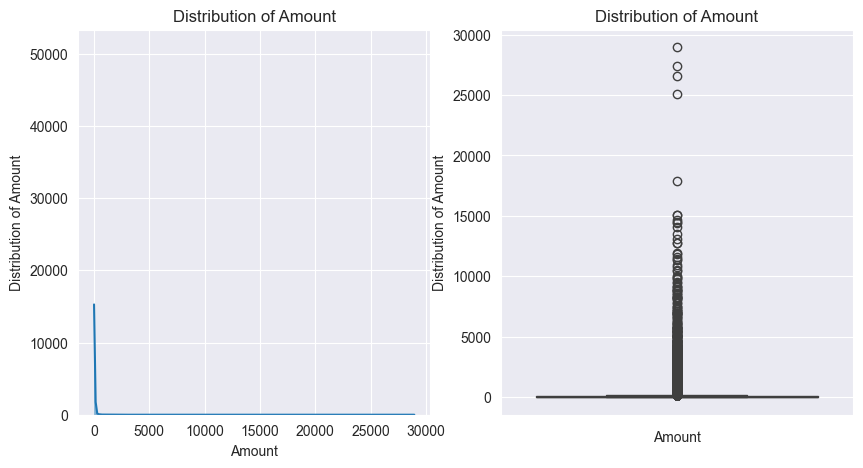

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [31]:
z_scores = (df['Amount'] - np.mean(df['Amount'])) / np.std(df['Amount'])
df = df[np.abs(z_scores) <= 3]

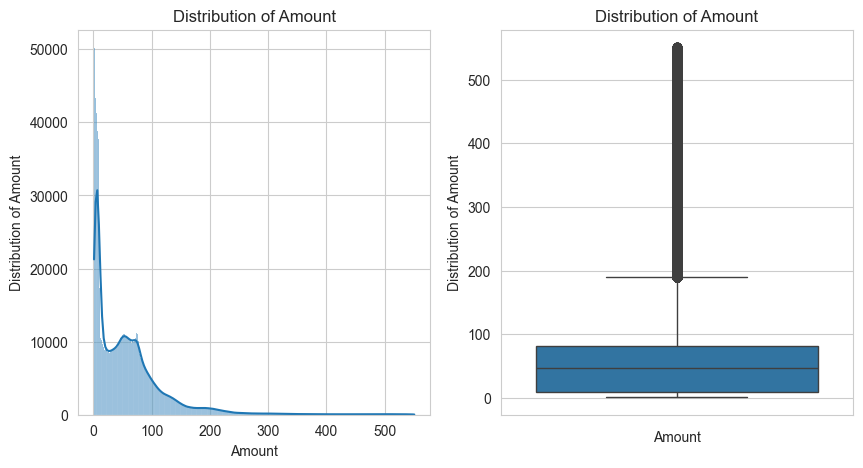

In [33]:
fig1, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['Amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['Amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [34]:
df['log_amount'] = np.log(df['Amount'])

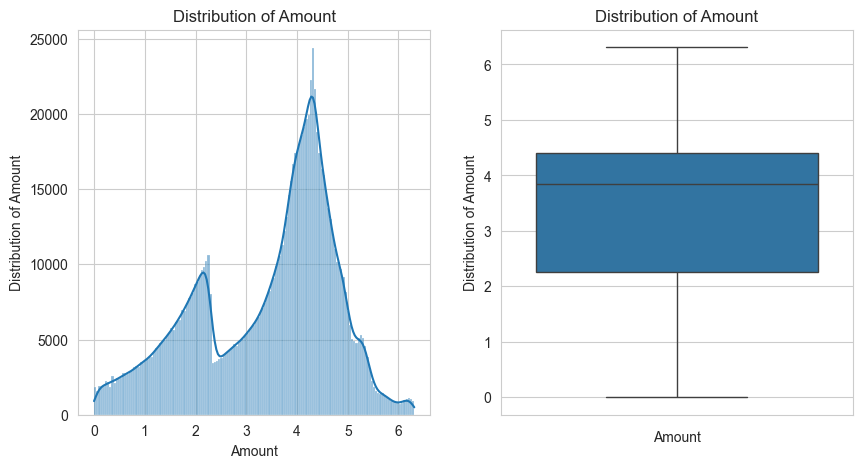

In [36]:
fig2, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(ax=ax1,data=df['log_amount'], kde=True)
ax1.set_title('Distribution of Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Distribution of ' + 'Amount')
sns.boxplot(data=df['log_amount'])
ax2.set_title('Distribution of Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Distribution of ' + 'Amount')
plt.show()

In [38]:
df.drop(columns='Amount',inplace=True)

In [39]:
df.dtypes

Card Number         float64
merchant             object
category             object
is_fraud            float64
Time:year             int32
Time:month            int32
Time:day              int32
Time:day_of_week      int32
Time:hour             int32
Time:minute           int32
log_amount          float64
dtype: object

### *Merchant* feature (using Feature Hashing)

In [30]:
m = len(df.merchant.unique())
h = FeatureHasher(n_features=m, input_type='string')
FeatureToHash = df['merchant'].astype('str').values
HashedFeatures = h.transform(FeatureToHash).toarray()
hashed_df = pd.DataFrame(HashedFeatures,columns=[f'hashed_features_{i}' for i in range(HashedFeatures.shape[1])])
df = pd.concat([df,hashed_df],axis=1)

ValueError: Samples can not be a single string. The input must be an iterable over iterables of strings.

### *Merchant & Category* feature (using One Hot Encoding)

In [40]:
df = pd.get_dummies(data=df,columns=['merchant','category'],drop_first=True)

In [42]:
df.shape

(992295, 714)

### Applying *OverSampling & UnderSampling*